In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools

In [3]:
dftrain = pd.read_csv('train.csv')

In [4]:
dftest = pd.read_csv('test.csv')

In [5]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2296 entries, 0 to 2295
Data columns (total 8 columns):
frames           2296 non-null int64
dst_entropy      2296 non-null float64
src_entropy      2296 non-null float64
proto_entropy    2296 non-null float64
bps_in           2296 non-null float64
bps_out          2296 non-null float64
flows            2296 non-null float64
attack           2296 non-null int64
dtypes: float64(6), int64(2)
memory usage: 143.6 KB


In [6]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1106 entries, 0 to 1105
Data columns (total 8 columns):
frames           1106 non-null int64
dst_entropy      1106 non-null float64
src_entropy      1106 non-null float64
proto_entropy    1106 non-null float64
bps_in           1106 non-null float64
bps_out          1106 non-null float64
flows            1106 non-null float64
attack           1106 non-null int64
dtypes: float64(6), int64(2)
memory usage: 69.2 KB


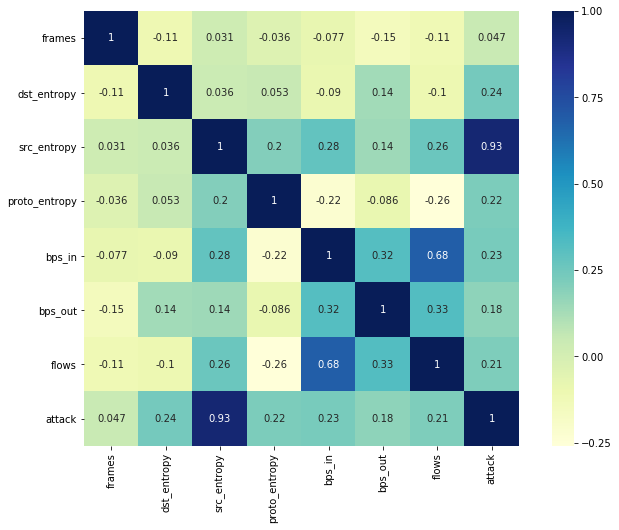

In [7]:
corr = dftrain.corr()
f,ax = plt.subplots(figsize=(12,8))
sns.heatmap(corr,vmax=1,square=True,cbar=True,annot=True,cmap='YlGnBu')

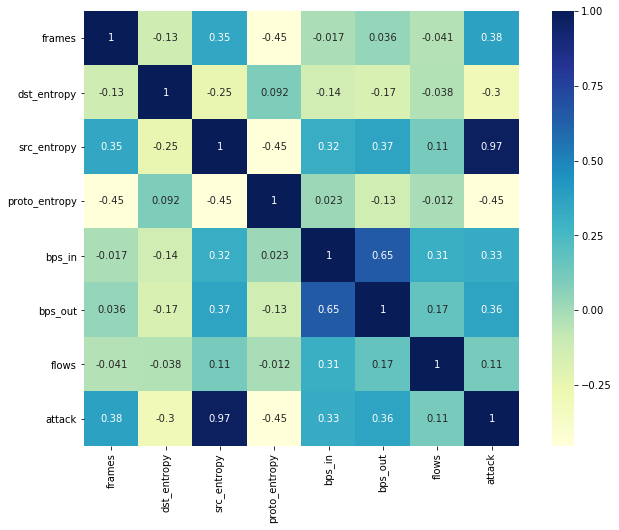

In [8]:
corr = dftest.corr()
f,ax = plt.subplots(figsize=(12,8))
sns.heatmap(corr,vmax=1,square=True,cbar=True,annot=True,cmap='YlGnBu')

In [9]:
y = dftrain['attack']
x = dftrain
del dftrain['attack']

In [10]:
from sklearn.metrics import accuracy_score

In [11]:
Y = dftest['attack']
X = dftest
del dftest['attack']

In [12]:
from sklearn.ensemble import GradientBoostingClassifier
predict = GradientBoostingClassifier()
predict.fit(X,Y)
pred = predict.predict(x)
accuracy = accuracy_score(y, pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 89.76%


In [13]:
from neupy.algorithms import RBFKMeans
rbfk_net = RBFKMeans(n_clusters=2,verbose=False)
rbfk_net.train(x)
predicted=rbfk_net.predict(X)
accuracy = accuracy_score(Y, predicted)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Accuracy: 54.70%


In [14]:
from sklearn.linear_model import LogisticRegression
clfb  = LogisticRegression()
clfb.fit(X,Y)
predic=clfb.predict(x)
accuracy = accuracy_score(y, predic)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 76.74%


In [15]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X,Y)
pred = model.predict(x)
accuracy = accuracy_score(y, pred)
print("Accuracy: %f%%" % (accuracy * 100.0))

Accuracy: 89.764808%


/home/vampire/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/vampire/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [16]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [17]:
cnf_matrix = confusion_matrix(y, pred)
cnf_matrix

array([[1302,   24],
       [ 211,  759]])

Confusion matrix, without normalization
[[1302   24]
 [ 211  759]]


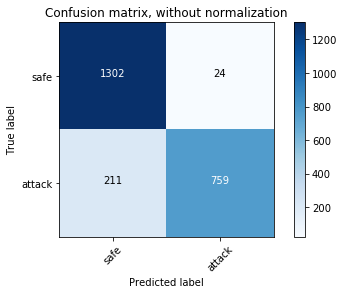

In [18]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['safe','attack'],
                      title='Confusion matrix, without normalization')